In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\ayush\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

In [2]:
df = pd.read_csv('human_vital_signs_dataset_2024.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                200020 non-null  int64  
 1   Heart Rate                200020 non-null  int64  
 2   Respiratory Rate          200020 non-null  int64  
 3   Timestamp                 200020 non-null  object 
 4   Body Temperature          200020 non-null  float64
 5   Oxygen Saturation         200020 non-null  float64
 6   Systolic Blood Pressure   200020 non-null  int64  
 7   Diastolic Blood Pressure  200020 non-null  int64  
 8   Age                       200020 non-null  int64  
 9   Gender                    200020 non-null  object 
 10  Weight (kg)               200020 non-null  float64
 11  Height (m)                200020 non-null  float64
 12  Derived_HRV               200020 non-null  float64
 13  Derived_Pulse_Pressure    200020 non-null  i

In [4]:
display(df.isnull().sum())
df.duplicated().sum()

Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
dtype: int64

np.int64(0)

In [5]:
df.drop(['Patient ID', 'Timestamp'], axis=1, inplace=True)

In [6]:
order = [['Low Risk', 'High Risk']]
le = LabelEncoder()
oe = OrdinalEncoder(categories=order)
df['Gender'] = le.fit_transform(df['Gender'])
df[['Risk Category']] = oe.fit_transform(df[['Risk Category']])
df['Risk Category'] = df['Risk Category'].astype(int)

In [7]:
df.describe()

,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
count,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000,200020.000000
mean,79.533747,15.489451,36.748353,97.504372,124.437971,79.499625,53.446275,0.499465,74.996419,1.750031,0.099970,44.938346,25.003625,94.479074,0.525522
std,11.552894,2.294472,0.433290,1.442598,8.656946,5.757248,20.786802,0.500001,14.471502,0.144554,0.028861,10.404945,6.447143,4.797891,0.499349
min,60.000000,12.000000,36.000004,95.000007,110.000000,70.000000,18.000000,0.000000,50.000156,1.500001,0.050000,21.000000,12.505974,83.333333,0.000000
25%,70.000000,13.000000,36.372613,96.256859,117.000000,75.000000,35.000000,0.000000,62.423615,1.624777,0.074955,37.000000,20.134367,91.000000,0.000000
50%,80.000000,15.000000,36.747741,97.509629,124.000000,79.000000,53.000000,0.000000,74.977169,1.750478,0.099988,45.000000,24.320776,94.333333,1.000000
75%,90.000000,17.000000,37.123003,98.755722,132.000000,84.000000,71.000000,1.000000,87.539510,1.875310,0.124917,53.000000,29.187169,98.000000,1.000000
max,99.000000,19.000000,37.499992,99.999963,139.000000,89.000000,89.000000,1.000000,99.999765,1.999997,0.149999,69.000000,44.376487,105.666667,1.000000


In [8]:
X = df.drop(['Risk Category'], axis=1)
y = df['Risk Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160016, 14) (40004, 14) (160016,) (40004,)


In [9]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
shape_x = X_train_scaled.shape[1]

In [11]:
model = Sequential()
model.add(Input(shape=(shape_x,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9313 - loss: 0.1537
Epoch 2/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9832 - loss: 0.0412
Epoch 3/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9859 - loss: 0.0330
Epoch 4/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9881 - loss: 0.0288
Epoch 5/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.9896 - loss: 0.0258
Epoch 6/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9898 - loss: 0.0251
Epoch 7/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9906 - loss: 0.0231
Epoch 8/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9907 - loss: 0.0228
Epoch 9/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9915 - loss: 0.0215
Epoch 10/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9917 - loss: 0.0209
Epoch 11/50
5001/5001 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9919 - loss: 0.0199
Epoch 12/50
5001/5001 ━━━━

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,461 (13.52 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,308 (9.02 KB)

In [15]:
# Priction
y_pred = model.predict(X_test_scaled)
# Convert probabilities to binary predictions (0 or 1)
y_pred_class = (y_pred > 0.5).astype('int32')


1251/1251 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

----------- Evaluation -----------
Accuracy Score: 0.9974502549745026

Confusion Matrix:


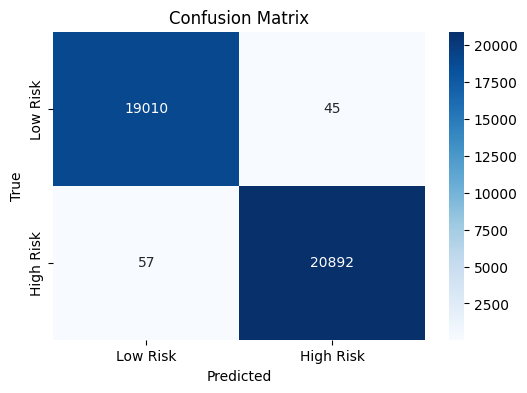

In [17]:
# Evaluation
print('----------- Evaluation -----------')
accuracy_bc = accuracy_score(y_test, y_pred_class)
print(f'Accuracy Score: {accuracy_bc}')

cm = confusion_matrix(y_test, y_pred_class)
print("\nConfusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
report_dl = classification_report(y_test, y_pred_class, output_dict=True)
display(pd.DataFrame(report_dl))

,0,1,accuracy,macro avg,weighted avg
precision,0.997011,0.997851,0.99745,0.997431,0.997451
recall,0.997638,0.997279,0.99745,0.997459,0.997450
f1-score,0.997324,0.997565,0.99745,0.997445,0.997450
support,19055.000000,20949.000000,0.99745,40004.000000,40004.000000
